# Homework 4  
# "People like you..." (part 1 of 2)
### Assigned Monday, 23 Apr 2018  /  Due Friday, 27 Apr  2018

#### Goal:

In lab 11 we used cosine simularity to compare users to users and movies to movies. Here we're going to use cosine simularity and PCA to postulate relationships between individuals. We're then going to reflect on the implications of what we did. <b>This homework should take between 1 and 2 hours to do.</b>   

More specifically, you're going to
1. Get the "Adult" machine learning data set and convert nonnumerical information into numerical values;
2. Employ cosine simularities to compare individuals;
3. Use PCA to graphically represent this data in two dimensions;
4. Use K-means on PCA results to generate clusters within data (in homework 5).
5. Reflect upon the ethical implications of this approach and the construction of the data set (in homework 5). 

We'll build on what we do here in homework 5, where we'll take our PCA results and perform K-means on them to generate clusters. 

## Homework Problems 
####  Be sure to rename this homework so that it includes your name. 

### question 1 [15 points]
1. Download the "adult" data set we used in Lab 12b ("FAT") from the machine learning repository (https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) and import this into pandas dataframe named "data". I've given you the column names in the list "features" below. 
2. To get a sense of the data, use the `head` command.
3. <b>Using the code in Lab 12b</b>, convert strings values in this data set to numerical values. 
4. Use `head` again to confirm you successfully converted features into numerical values.

In [1]:
features = ['age','workclass', 'fnlwgt', 'education', 'education.num', 'marital.status','occupation', 'relationship','race','sex','capital.gain','capital.loss', 'hours.per.week', 'native.country','income']

In [2]:
# Provide your code here


In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use
plt.rcParams['figure.figsize'] = (15, 5)

In [4]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=',', header=None, na_values="?", names=features)

In [5]:
data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
## converts strings to numerical values
## from https://www.kaggle.com/dewilliams/ml-adult-income

from sklearn.preprocessing import LabelEncoder

def preprocess_features(dframe):
    for column in dframe:
        enc = LabelEncoder()
        if(column not in ['age','education.num','fnlwgt','capital.gain','capital.loss','hours.per.week']):
            dframe[column] = enc.fit_transform(dframe[column])
    return dframe

In [7]:
data=data[features]
data = preprocess_features(data)
data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


### question 2 [10 points]
Now that we've converted all the categorical data to numerical data, let's normalize all of these variables (i.e., columns) to be between 0.0 and 1.0. This is an interpretative decision: we are effectively deciding not to allow any of these variables to have a greater maximum or minimum magnitude than any other variable. (We might also want to argue about how we coverted our categorical variables into continous variables.) Yet for the purposes of this homework, we press on.  

We can take advantage of pandas to normalize our dataframe 'data'. In the interests of saving you time, here's the code:

In [8]:
# normalize dataframe "data"
normalized_data = (data-data.min())/(data.max()-data.min())

Now, much like what we did in lab 11 ("database & recomendation) with films, we want to compute the cosine simularity between each person based on their attributes. Below I give you an example for producing cosine simularity scores for the first person in "data" and everyone else:

In [9]:
# If this step gives you a memory error or kernel crash, use normalized_data[0:5000] in place of normalized_data
from sklearn.metrics.pairwise import cosine_similarity
similarity_for_one_person = cosine_similarity(normalized_data.iloc[[0]], normalized_data)
similarity_for_one_person

array([[1.        , 0.97100048, 0.92214154, ..., 0.83191552, 0.9533934 ,
        0.73019255]])

Given the above example, calculate the cosine simularity for the entire dataframe "data". Name this array `simularity`. 

Hint 1: The solution to this is just one line of code. If you want to take cosine simularity of a whole array (rather than an individual row as we did above), you can enter the array as the sole argument of the cosine_similarity function. You can check your answer by (1) comparing the first row to the answer above for one person.  
Hint 2: If the step below gives you a memory error or kernel crash, use `normalized_data[0:5000]` in place of `normalized_data`.

In [10]:
#If this step gives you a memory error or kernel crash, use only normalized_data[0:5000] in place of normalized_data

similarity = cosine_similarity(normalized_data)
similarity

array([[1.        , 0.97100048, 0.92214154, ..., 0.83191552, 0.9533934 ,
        0.73019255],
       [0.97100048, 1.        , 0.95452442, ..., 0.76269055, 0.91497791,
        0.69939202],
       [0.92214154, 0.95452442, 1.        , ..., 0.73357733, 0.91247573,
        0.72703205],
       ...,
       [0.83191552, 0.76269055, 0.73357733, ..., 1.        , 0.8558647 ,
        0.85571397],
       [0.9533934 , 0.91497791, 0.91247573, ..., 0.8558647 , 1.        ,
        0.76047169],
       [0.73019255, 0.69939202, 0.72703205, ..., 0.85571397, 0.76047169,
        1.        ]])

### question 3 [20 points] 
Now we have a similarity matrix describing a set of relationships postulated between different individuals in the data set based on the similarity of the 15 features in the data set. We'd like to visualize this simularity to get some sense of how the individuals are distributed with respect to each other. To do this, we again return to our trusty unsupervised learning technique: PCA. 

For this question, make PCA plots for three different sets of people from `similarity`: 
1. PCA on the first 100 individuals in `similarity`. 
2. PCA on the first 500 individuals in `similarity`. 
3. PCA on the first 1500 individuals in `similarity`. 
4. PCA on the last 1500 individuals in `similarity`.

[Note: If you have memory or kernal crash problems, use smaller numbers, e.g. 600 instead of 1500, etc.]

We'll reflect deeply on the ethics of using this data set and on performing simularity measures on *people* in our next and final homework, using the work we did here as our starting point. For purposes of time we'll end this homework here with the caveat that there remains much to discuss and that we need to continue this conversation in part II of this homework (i.e., homework 5).

In [11]:
# libraries to get you started
from sklearn.decomposition import PCA as PCA 
import matplotlib.pyplot as plt

In [12]:
# Enter your PCA code here



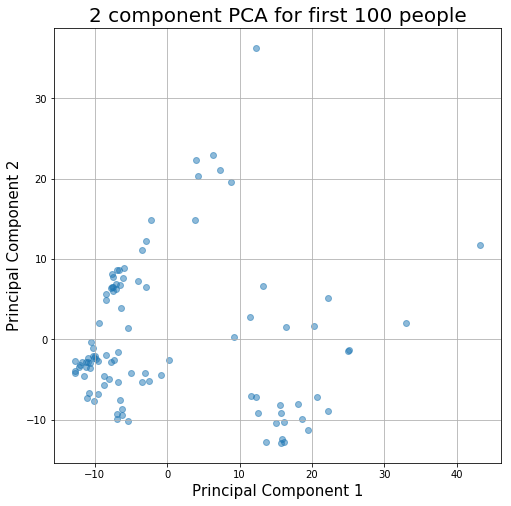

In [13]:
pca_2d = PCA(n_components=2)
pca_2d_coordinates = pca_2d.fit_transform(similarity[0:100])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for first 100 people', fontsize = 20)
ax.grid()
plt.scatter(pca_2d_coordinates[:,0],pca_2d_coordinates[:,1], alpha =.5)
plt.show()

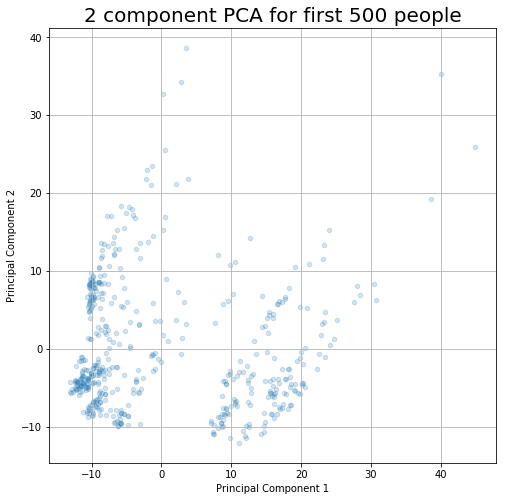

In [14]:
pca_2d = PCA(n_components=2)
pca_2d_coordinates = pca_2d.fit_transform(similarity[0:500])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA for first 500 people', fontsize = 20)
ax.grid()
plt.scatter(pca_2d_coordinates[:,0],pca_2d_coordinates[:,1], s=20, alpha=.2)
plt.show()

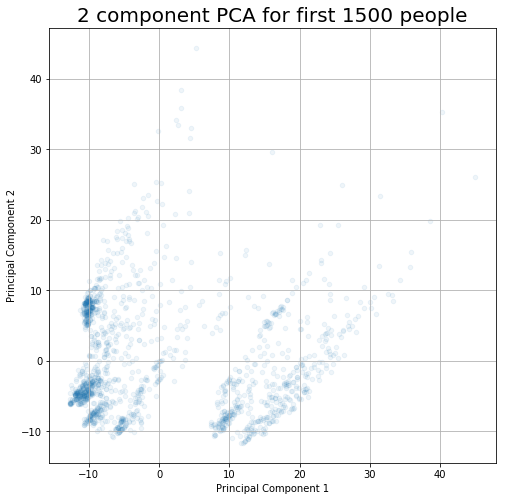

In [17]:
pca_2d = PCA(n_components=2)
pca_2d_coordinates = pca_2d.fit_transform(similarity[:1500])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA for first 1500 people', fontsize = 20)
ax.grid()
plt.scatter(pca_2d_coordinates[:,0],pca_2d_coordinates[:,1],alpha=.07, s = 20)
plt.show()


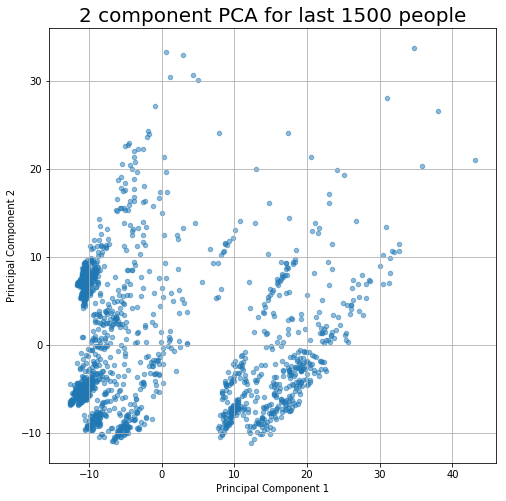

In [16]:
pca_2d = PCA(n_components=2)
pca_2d_coordinates = pca_2d.fit_transform(similarity[-1500:])
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA for last 1500 people', fontsize = 20)
ax.grid()
plt.scatter(pca_2d_coordinates[:,0],pca_2d_coordinates[:,1], alpha=.5, s=20)
plt.show()